# Business Understanding

Gemeente Zwolle wil integraal te werk gaan met de verschillende afdelingen die betrokken zijn met wegen die opengemaakt moeten worden voor onderhoud of aanpassingen. Voor ons is het de taak om dit met de afdelingen groen (bomen), grijs (wegen) en blauw (riool) te coördineren en op basis van de beschikbare data waarde te realiseren naar de gemeente. Als groep gaan wij bezig met het deel blauw waarin onze opdrachtgever graag een model wilt hebben die hem kan assisteren met besluiten maken over onderhoud van het riool, en of dit gecombineerd kan worden met wegonderhoud en of groenonderhoud. Aan ons de taak om op basis van de aangeleverde data een beslismodel te maken voor de stakeholder Gerrit die hem kan assisteren met het bepalen of een riool gereinigd, vervangen of gerepareerd moet worden. Waar mogelijk dienen wij dit te combineren met de andere afdelingen namelijk wegen en groen.  

Als tweede doel wilt Gemeente Zwolle een goede samenwerking tussen de verschillende afdelingen (groen, grijs en blauw) om efficienter te werken. Bijv. een weg open trekken wanneer zowel het riool eronder en de weg zeg aan onderhoud toe zijn. Om zo kort mogelijk een weg af te zetten en geld en tijd te besparen.

Gemeente zwolle hanteert 4 beoordelings aspecten (BDD, BAF, BCC, BAB). De beoodelingsaspecten bevatten een waarde van klasse 1 t/m 5. (klasse 1: geen actie nodig ... klasse 5: hoge nood). 
- BDD: waterdiepte
- BAF: maat van aantasting
- BCC: Kromming in riool
- BAB: Scheuren

## Data Understanding

In [7]:
from simpledbf import Dbf5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [8]:
# Import data
dbf_levensduur = Dbf5('data/Riooldata/Levensduur.dbf')
dbf_riolering = Dbf5('data/Riooldata/Riolering.dbf')
dbf_schades = Dbf5('data/Riooldata/Schades.dbf')

dbf_putten = Dbf5(r'data/riolering april 2022/putten.dbf')
dbf_putten_toekomst = Dbf5(r'data/riolering april 2022/putten-toekomst.dbf')
dbf_strengen = Dbf5(r'data/riolering april 2022/Strengen.dbf')
dbf_strengen_toekomst = Dbf5(r'data/riolering april 2022/Strengen-toekomst.dbf')

In [9]:
# Convert data to dataframes
df_levensduur = dbf_levensduur.to_dataframe()
df_riolering = dbf_riolering.to_dataframe()
df_schades = dbf_schades.to_dataframe()

df_putten = dbf_putten.to_dataframe()
df_putten_toekomst = dbf_putten_toekomst.to_dataframe()
df_strengen = dbf_strengen.to_dataframe()
df_strengen_toekomst = dbf_strengen_toekomst.to_dataframe()

In [10]:
gdf_levensduur = gpd.read_file(r'data/Riooldata/Levensduur.shp')
gdf_riolering = gpd.read_file(r'data/Riooldata/Riolering.shp')

gdf_strengen = gpd.read_file(r'data/riolering april 2022/Strengen.shp')
gdf_strengen_toekomst = gpd.read_file(r'data/riolering april 2022/Strengen-toekomst.shp')

gdf_putten = gpd.read_file(r'data/riolering april 2022/putten.shp')
gdf_putten_toekomst = gpd.read_file(r'data/riolering april 2022/putten-toekomst.shp')

In [11]:
gdf_riolering.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 21166 entries, 0 to 21165
Data columns (total 60 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    21166 non-null  int64   
 1   AMBITIENIV  21166 non-null  object  
 2   BEGINDATUM  21117 non-null  object  
 3   EINDDATUM   0 non-null      object  
 4   BEHEEROBJE  21166 non-null  object  
 5   BOB_BEGINK  21166 non-null  float64 
 6   BOB_EINDKN  21166 non-null  float64 
 7   BREEDTE_DI  21166 non-null  float64 
 8   BUURT       797 non-null    object  
 9   EXTRA_INFO  20143 non-null  object  
 10  EXTRA_IN_1  20138 non-null  object  
 11  EXTRA_IN_2  20721 non-null  object  
 12  FUNDERING   21050 non-null  object  
 13  GEGEVENSOO  1098 non-null   object  
 14  GEGEVENS_1  2109 non-null   object  
 15  GEGEVENS_2  2096 non-null   object  
 16  GEOTEXTIEL  0 non-null      object  
 17  GRONDSOORT  20154 non-null  object  
 18  HOOGTE      21166 non-null  float64 
 

# Data Preparation

In [12]:
# Merge de schading aan de riolering data
gdf_riolering_schades = gdf_riolering.merge(df_schades, how='left', left_on='OBJECTID', right_on='REL_OBJECT', suffixes=("_riool", "_schades"))
gdf_riolering_schades.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22726 entries, 0 to 22725
Data columns (total 74 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   OBJECTID_riool      22726 non-null  int64   
 1   AMBITIENIV          22726 non-null  object  
 2   BEGINDATUM          22676 non-null  object  
 3   EINDDATUM           0 non-null      object  
 4   BEHEEROBJE_riool    22726 non-null  object  
 5   BOB_BEGINK          22726 non-null  float64 
 6   BOB_EINDKN          22726 non-null  float64 
 7   BREEDTE_DI          22726 non-null  float64 
 8   BUURT               807 non-null    object  
 9   EXTRA_INFO          21696 non-null  object  
 10  EXTRA_IN_1          21691 non-null  object  
 11  EXTRA_IN_2          22276 non-null  object  
 12  FUNDERING           22606 non-null  object  
 13  GEGEVENSOO          1111 non-null   object  
 14  GEGEVENS_1          2188 non-null   object  
 15  GEGEVENS_2          2171 non

In [13]:
gdf_riolering_schades.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
OBJECTID_riool,22726.0,10517.988603,6090.340242,1.000000,5228.250000,10482.500000,15797.750000,21166.00000
BOB_BEGINK,22726.0,-0.396046,0.792797,-4.080000,-0.740000,-0.310000,0.000000,7.23000
BOB_EINDKN,22726.0,-0.433030,0.793817,-4.130000,-0.800000,-0.350000,0.000000,9.56000
BREEDTE_DI,22726.0,339.802033,195.703091,0.000000,250.000000,300.000000,315.000000,10000.00000
HOOGTE,22726.0,33.744434,177.299399,0.000000,0.000000,0.000000,0.000000,5000.00000
LENGTE,22726.0,37.230713,29.177821,0.700000,21.910000,36.455000,50.527500,1887.23000
AANTAL_KOL,22726.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
AANTAL_PER,22726.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
GEGEVENS_3,22726.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
VRIJE_BREE,22726.0,4.534366,8.899385,0.000000,0.000000,0.000000,0.000000,22.00000


In [14]:
# filter useful columns
# gdf_riolering_schades_clean = gdf_riolering_schades.drop(columns=['OBJECTID_schades','AMBITIENIV','EINDDATUM','AANTAL_KOL','AANTAL_PER','GEGEVENS_3','WANDRUWHEI','FOTOLINK','WEGVERHARD'])
gdf_riolering_schades_clean = gdf_riolering_schades[['OBJECTID_riool','BEHEEROBJE_riool','STRAATCODE','STRAATNAAM','BAB','BAF','BBC','BDD','geometry']]
gdf_riolering_schades_clean

,OBJECTID_riool,BEHEEROBJE_riool,STRAATCODE,STRAATNAAM,BAB,BAF,BBC,BDD,geometry
0,1,LEI-001-00054,0110,Amstel,NaN,NaN,NaN,NaN,"LINESTRING (203359.910 504382.280, 203391.250 ..."
1,2,LEI-001-00056,0120,Anjelierstraat,NaN,NaN,NaN,NaN,"LINESTRING (203687.040 502003.330, 203699.640 ..."
2,3,LEI-001-00057,0120,Anjelierstraat,NaN,NaN,NaN,NaN,"LINESTRING (203648.070 501882.590, 203660.960 ..."
3,4,LEI-001-00058,0125,Anjerweg,NaN,NaN,NaN,NaN,"LINESTRING (199987.790 504206.830, 199974.860 ..."
4,5,LEI-001-00059,0125,Anjerweg,NaN,NaN,NaN,NaN,"LINESTRING (200141.920 504140.030, 200089.680 ..."
...,...,...,...,...,...,...,...,...,...
22721,21162,LEI-001-11762,1615,Groot Wezenland,NaN,NaN,NaN,NaN,"LINESTRING (203217.610 502563.920, 203208.040 ..."
22722,21163,LEI-001-11373,3345,Oldeneelallee,NaN,NaN,NaN,NaN,"LINESTRING (204558.990 500095.760, 204555.420 ..."
22723,21164,LEI-001-13156,2950,Marsweg,NaN,NaN,NaN,NaN,"LINESTRING (204970.070 501303.440, 205013.980 ..."
22724,21165,LEI-001-15345,2950,Marsweg,NaN,NaN,NaN,NaN,"LINESTRING (205013.980 501313.240, 204995.900 ..."


In [15]:
gdf_riolering_schades_clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 22726 entries, 0 to 22725
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   OBJECTID_riool    22726 non-null  int64   
 1   BEHEEROBJE_riool  22726 non-null  object  
 2   STRAATCODE        22701 non-null  object  
 3   STRAATNAAM        22701 non-null  object  
 4   BAB               11 non-null     object  
 5   BAF               866 non-null    object  
 6   BBC               3398 non-null   object  
 7   BDD               3712 non-null   object  
 8   geometry          22726 non-null  geometry
dtypes: geometry(1), int64(1), object(7)
memory usage: 1.7+ MB


In [28]:
pd.unique(gdf_riolering_schades_clean['BAB'])

array([nan,
       'BAB4 - scheur - zichtbare scheurlijnen op de buiswand, brokken nog op hun plaats',
       'BAB5 - scheur - zichtbaar open scheuren in de buiswand, brokken nog op hun plaats'],
      dtype=object)

In [29]:
pd.unique(gdf_riolering_schades_clean['BAF'])

array([nan, 'BAF3 - toeslagstoffen die uitsteken',
       'BAF4 - ontbrekende toeslagstof', 'BAF2 - toeslagstof zichtbaar',
       'BAF1 - toegenomen wandruwheid'], dtype=object)

In [30]:
pd.unique(gdf_riolering_schades_clean['BBC'])

array([nan, 'BBC1 - h <= 5%', 'BBC3 - 10% < h <= 25%',
       'BBC4 - 25% < h <= 50%', 'BBC5 - h > 50%', 'BBC2 - 5% < h <= 10%'],
      dtype=object)

In [31]:
pd.unique(gdf_riolering_schades_clean['BDD'])

array([nan, 'BDD1 - h <= 10%', 'BDD2 - 10% < h <= 25%',
       'BDD3 - 25% < h <= 50%', 'BDD5 - h > = 75%',
       'BDD4 - 50% < h <= 75%'], dtype=object)

In [17]:
# calculate integer val based on ['BAB', 'BAF', 'BBC', 'BDD'] string values
def val_to_int(val):
    if pd.isna(val):
        return 0
    return int(val[3])

In [35]:
gdf_riolering_schades_clean['BAB_int'] = gdf_riolering_schades_clean.apply(lambda row: val_to_int(row['BAB']), axis=1)
gdf_riolering_schades_clean['BAF_int'] = gdf_riolering_schades_clean.apply(lambda row: val_to_int(row['BAF']), axis=1)
gdf_riolering_schades_clean['BBC_int'] = gdf_riolering_schades_clean.apply(lambda row: val_to_int(row['BBC']), axis=1)
gdf_riolering_schades_clean['BDD_int'] = gdf_riolering_schades_clean.apply(lambda row: val_to_int(row['BDD']), axis=1)
gdf_riolering_schades_clean['max'] = gdf_riolering_schades_clean.apply(lambda row: max(row['BAB_int'],row['BAF_int'],row['BBC_int'],row['BDD_int']), axis=1)
gdf_riolering_schades_clean['total'] = gdf_riolering_schades_clean.apply(lambda row: (row['BAB_int']+row['BAF_int']+row['BBC_int']+row['BDD_int']), axis=1)

gdf_riolering_schades_clean

/Users/tomsamwel/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,OBJECTID_riool,BEHEEROBJE_riool,STRAATCODE,STRAATNAAM,BAB,BAF,BBC,BDD,geometry,BAB_int,BAF_int,BBC_int,BDD_int,max,total
0,1,LEI-001-00054,0110,Amstel,NaN,NaN,NaN,NaN,"LINESTRING (203359.910 504382.280, 203391.250 ...",0,0,0,0,0,0
1,2,LEI-001-00056,0120,Anjelierstraat,NaN,NaN,NaN,NaN,"LINESTRING (203687.040 502003.330, 203699.640 ...",0,0,0,0,0,0
2,3,LEI-001-00057,0120,Anjelierstraat,NaN,NaN,NaN,NaN,"LINESTRING (203648.070 501882.590, 203660.960 ...",0,0,0,0,0,0
3,4,LEI-001-00058,0125,Anjerweg,NaN,NaN,NaN,NaN,"LINESTRING (199987.790 504206.830, 199974.860 ...",0,0,0,0,0,0
4,5,LEI-001-00059,0125,Anjerweg,NaN,NaN,NaN,NaN,"LINESTRING (200141.920 504140.030, 200089.680 ...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22721,21162,LEI-001-11762,1615,Groot Wezenland,NaN,NaN,NaN,NaN,"LINESTRING (203217.610 502563.920, 203208.040 ...",0,0,0,0,0,0
22722,21163,LEI-001-11373,3345,Oldeneelallee,NaN,NaN,NaN,NaN,"LINESTRING (204558.990 500095.760, 204555.420 ...",0,0,0,0,0,0
22723,21164,LEI-001-13156,2950,Marsweg,NaN,NaN,NaN,NaN,"LINESTRING (204970.070 501303.440, 205013.980 ...",0,0,0,0,0,0
22724,21165,LEI-001-15345,2950,Marsweg,NaN,NaN,NaN,NaN,"LINESTRING (205013.980 501313.240, 204995.900 ...",0,0,0,0,0,0


# Modelling

In [19]:
plt.rcParams["figure.figsize"] = (24, 18)
sns.set_context('poster')

<AxesSubplot:>

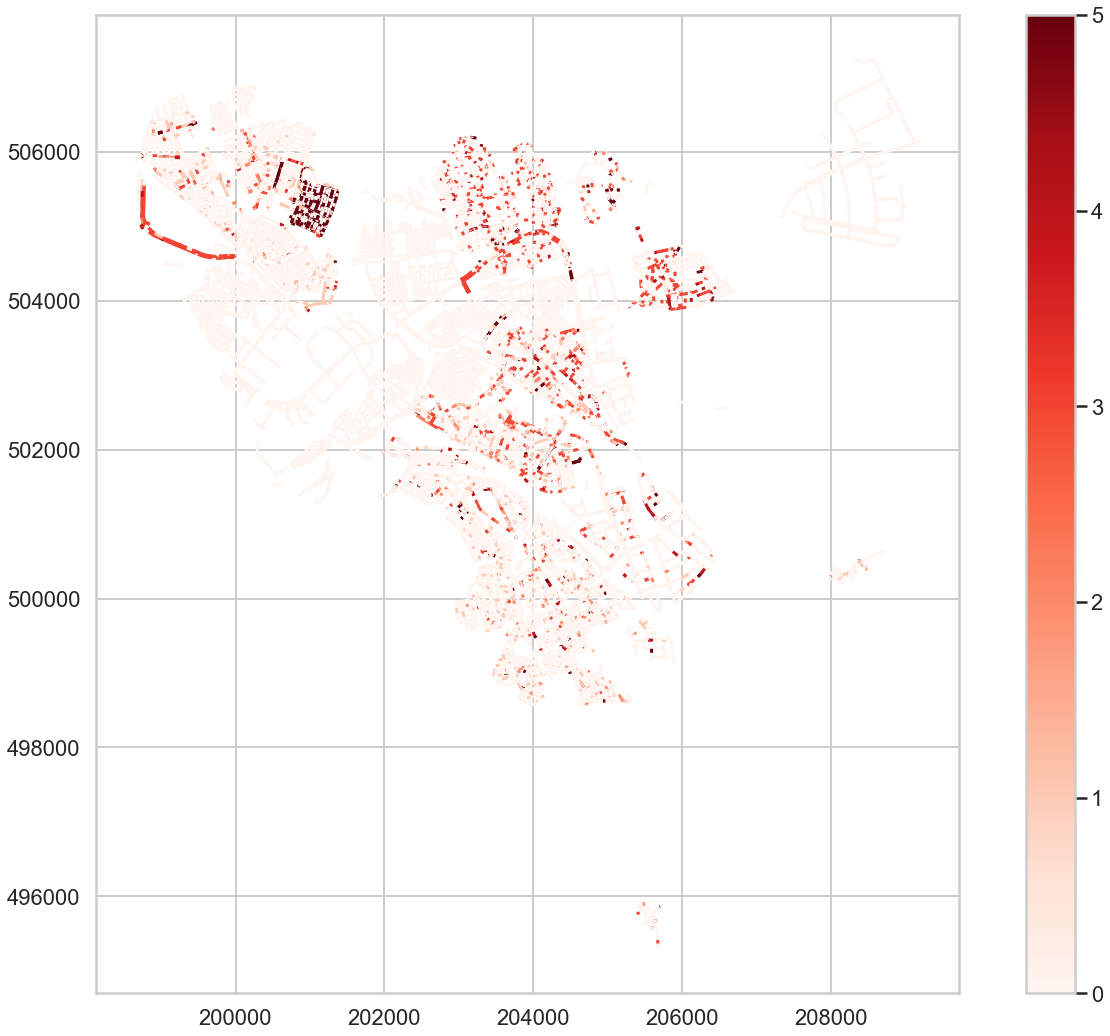

In [38]:
gdf_riolering_schades_clean.plot('max', cmap='Reds', legend=True)

<AxesSubplot:>

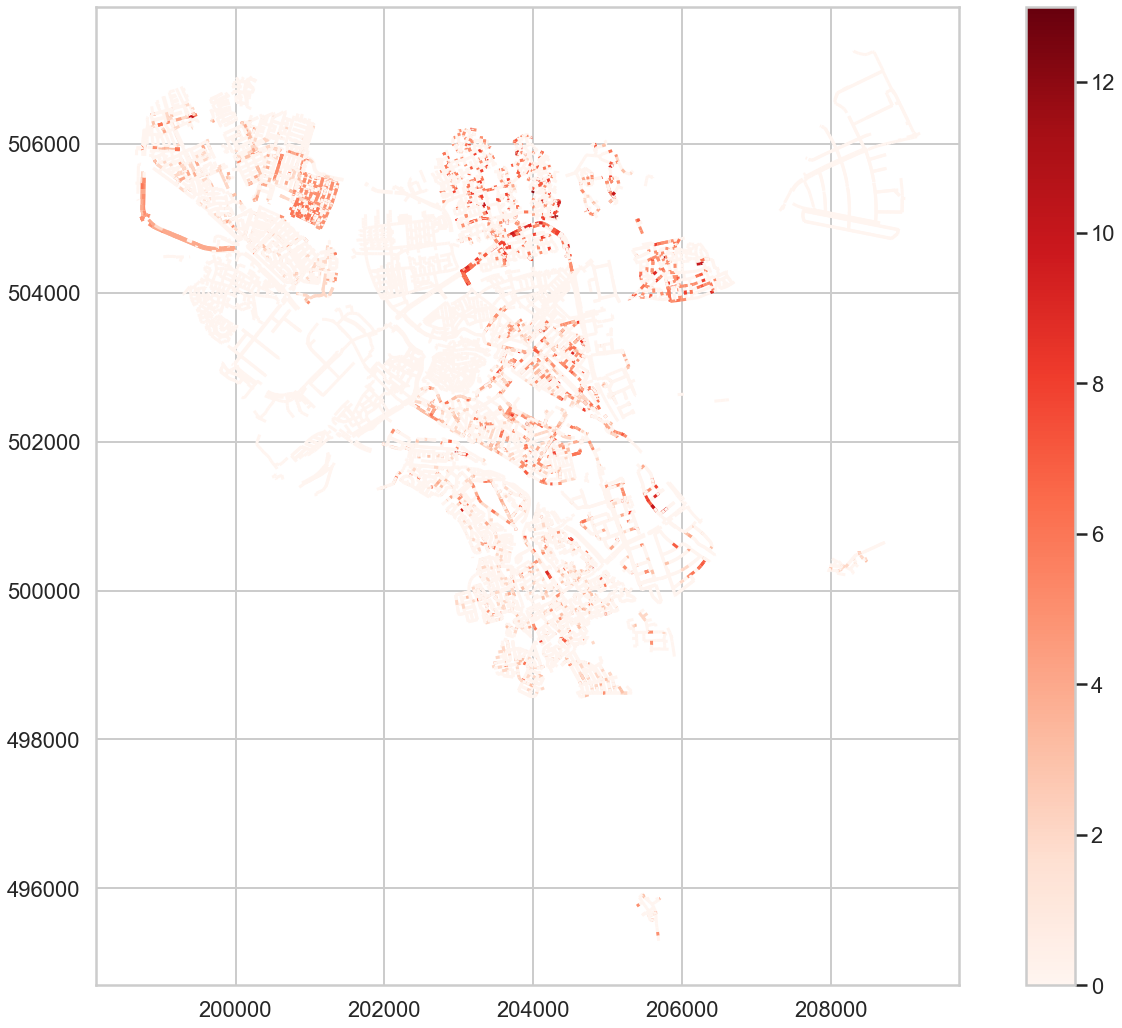

In [37]:
gdf_riolering_schades_clean.plot('total', cmap='Reds', legend=True)

<AxesSubplot:>

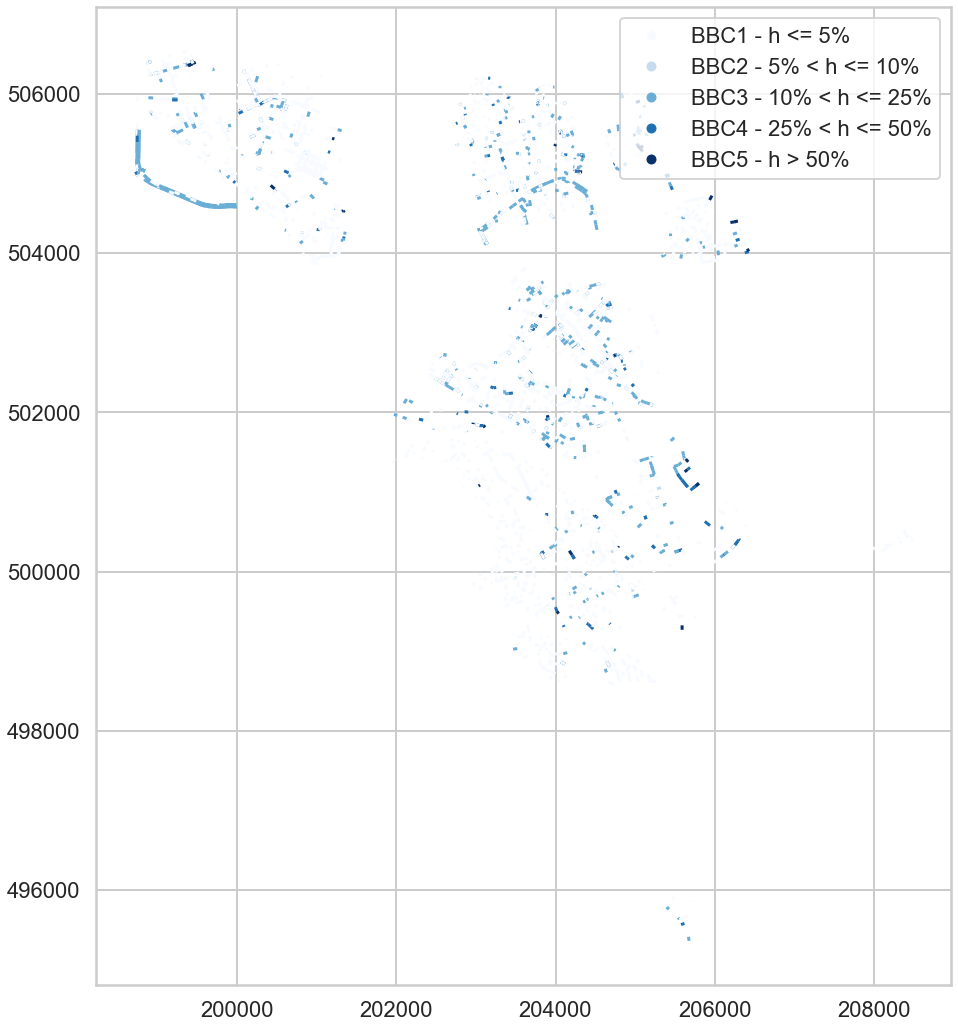

In [23]:
#gdf_levensduur.explore()
gdf_riolering_schades_clean.plot('BBC', legend=True, cmap='Blues')

<AxesSubplot:>

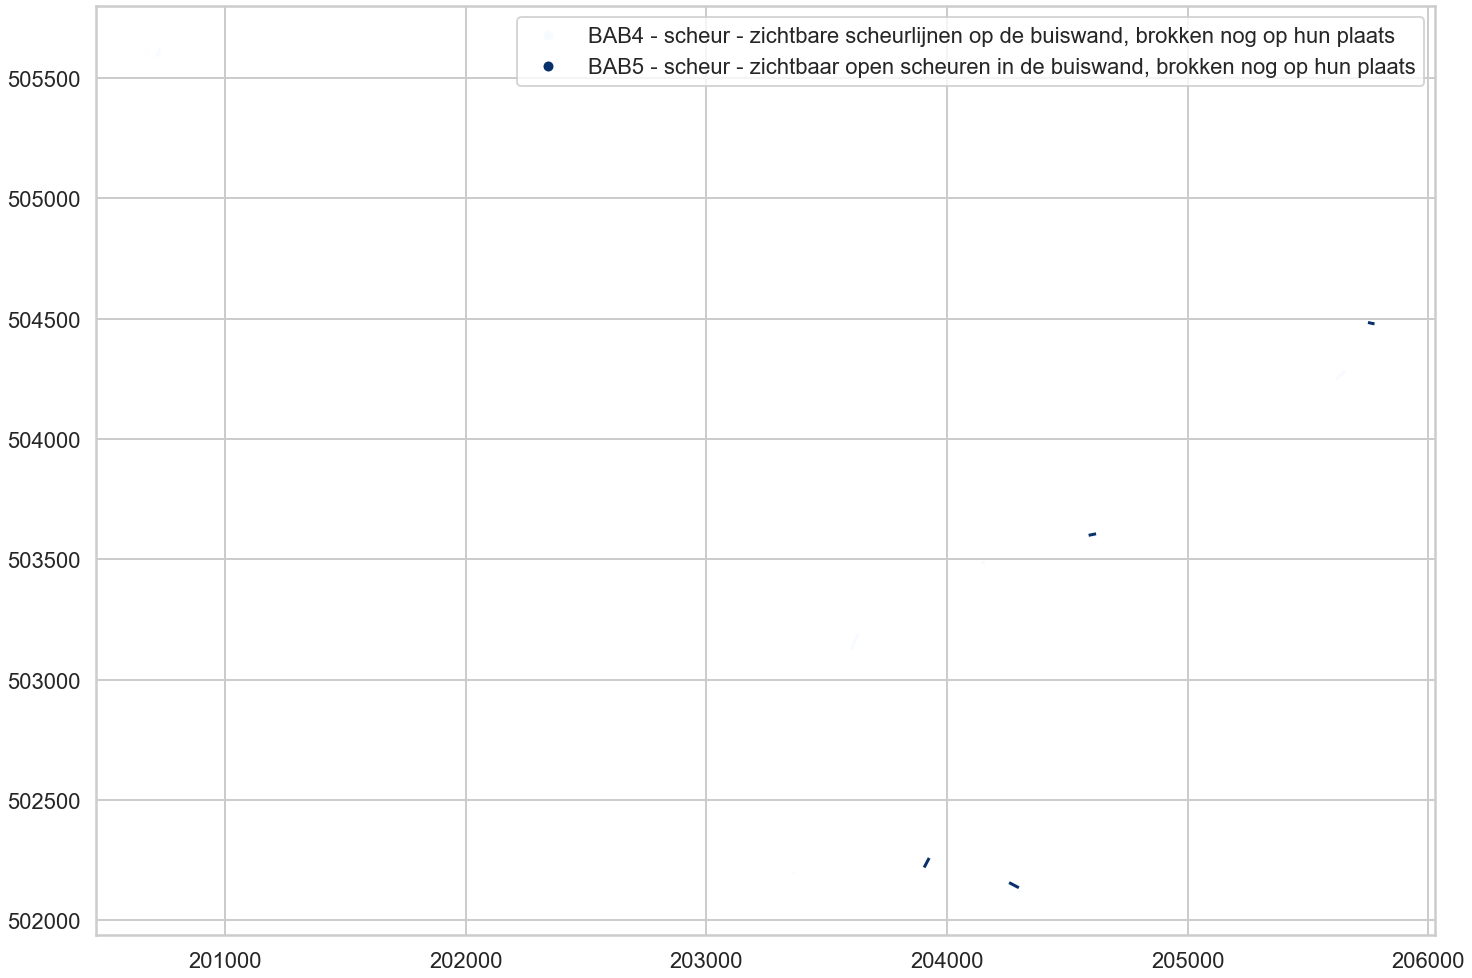

In [24]:
gdf_riolering_schades_clean.plot('BAB', legend=True, cmap='Blues')

<AxesSubplot:>

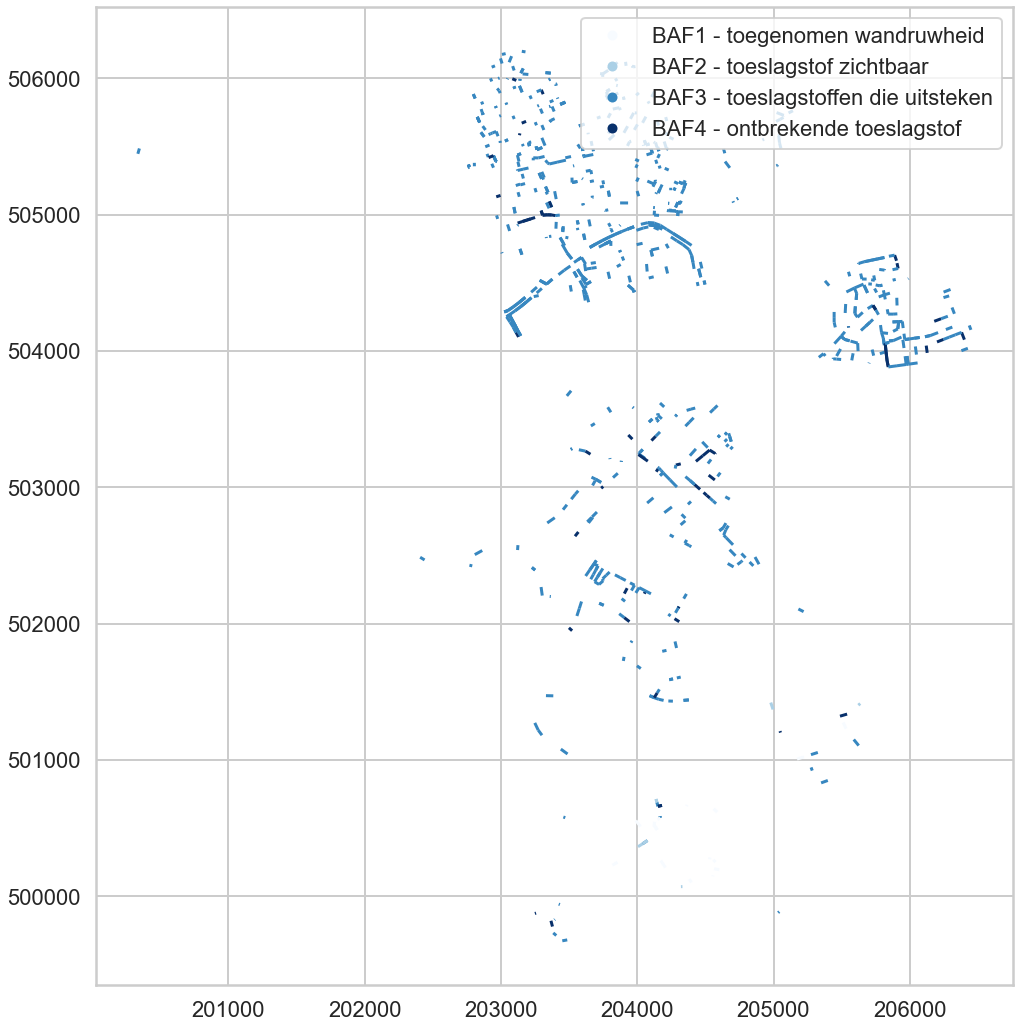

In [25]:
gdf_riolering_schades_clean.plot('BAF', legend=True, cmap='Blues')

<AxesSubplot:>

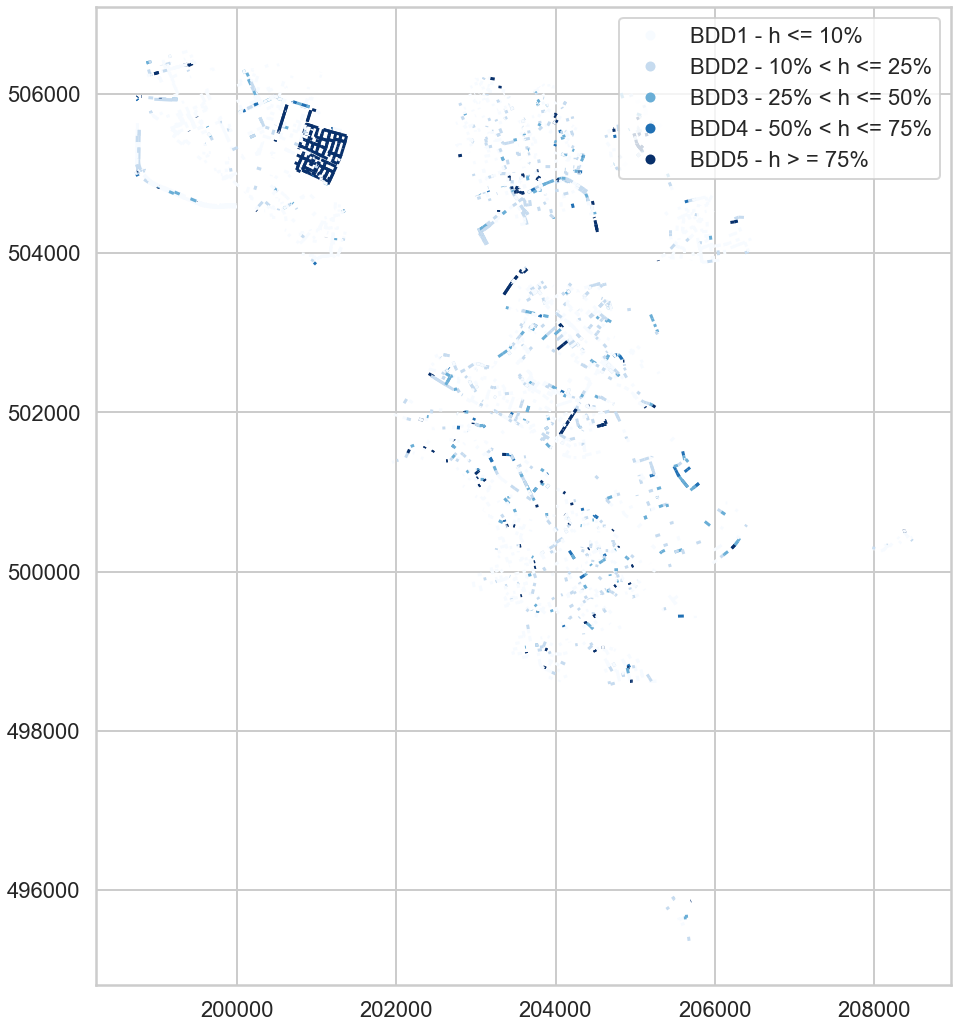

In [26]:
gdf_riolering_schades_clean.plot('BDD', legend=True, cmap='Blues')

<AxesSubplot:>

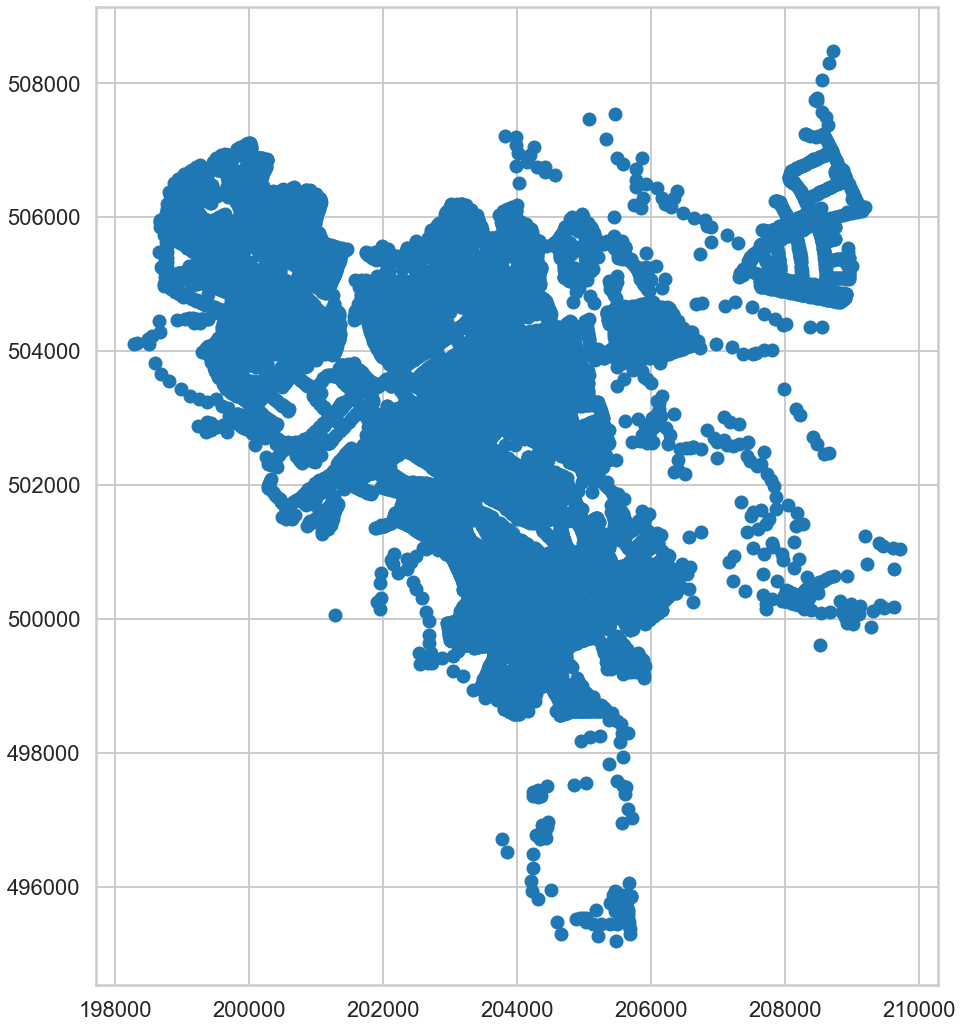

In [27]:
gdf_putten.plot()